# Regressio

etsitään suora, joka myötäilee arvoja

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

![image.png](../p/ex1.png)
![image.png](../p/ex2.png)

# Neliösumma

In [146]:
x = np.arange(1, 11)
y = x**2 - 7*x + 5 + 5*np.random.randn(10)

In [147]:
# Haetaan polynomin kertoimet
kertoimet = np.polyfit(x, y, 3)
print(kertoimet)
# Luodaan polynomifunktio kertoimien perusteella
p = np.poly1d(kertoimet)
# X:n arvot pisteissä 1-10 (100 pistettä)
xx = np.linspace(1, 10, 100)
# Y:n arvo pisteissä x
yy = p(xx)



[ 0.10020348 -0.64897821  0.46520095 -3.11732409]


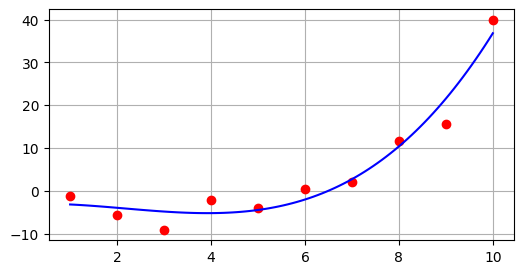

In [148]:
plt.figure(figsize=(6,3))
plt.plot(x, y, 'ro')
plt.plot(xx, yy,'b-')
plt.grid()
plt.show()

In [149]:
np.sqrt(np.sum((p(x)-y)**2))

9.264144146282817

# Training set and test set


In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


iris = pd.read_csv('../datasets/iris.csv').drop(columns = ['sepal_length','sepal_width'])
iris

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


X_test ja Y_test ei saa käyttää kouluttamiseen. Pelkästään testaamiseen


In [151]:



X = iris.drop(columns = 'species')
y = iris['species']
# koulutus- ja testijoukkojen jako
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
knn = KNeighborsClassifier(n_neighbors=3)
# koulutus
knn.fit(X_train, y_train)
# ennusteet testijoukkoon
y_pred = knn.predict(X_test)
# tarkkuus
accuracy_test = accuracy_score(y_test, y_pred)
print(f'Test accuracy on the test set: {accuracy_test:.2f}')

accuracy_test = accuracy_score(y_train, knn.predict(X_train))
print(f'Train accuracy on the train set: {accuracy_test:.2f}')


Test accuracy on the test set: 0.96
Train accuracy on the train set: 0.98


# Cross-validation

In [152]:
from sklearn.neighbors import KNeighborsClassifier

X = iris.drop(columns = 'species')
y = iris['species']

knn = KNeighborsClassifier(n_neighbors=3)


from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

# Calculate and print the average accuracy over the folds
average_accuracy = scores.mean()
print(f"Average accuracy of kNN classifier using 10-fold cross-validation: {average_accuracy:.2f}")
scores

Average accuracy of kNN classifier using 10-fold cross-validation: 0.96


array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.93333333, 0.86666667, 1.        , 1.        , 1.        ])